In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
Data_Path = 'D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\SOC_Prediction\\Dataset\\Lithium-Ion Battery Drive Cycle Dataset\\2_preprocessed'

In [4]:
# Load your preprocessed 10Hz data (example)
df = pd.read_csv(Data_Path + '\\JY_SOC_5deg\\1_BCDC_5deg.csv')

# Compute stress indicators
stress = {
    'max_current': df['Current'].abs().max(),
    'rms_current': np.sqrt(np.mean(df['Current']**2)),
    'soc_swing': df['SOC'].max() - df['SOC'].min(),
    'max_temp': df['Temperature'].max(),
    'avg_power': (df['Current'] * df['Voltage']).mean()
}
print(stress)

{'max_current': 9.934162180492269, 'rms_current': 1.8190094282077964, 'soc_swing': 0.8837936982514139, 'max_temp': 8.52631, 'avg_power': -3.0040104975856567}


In [5]:
all_stress_results = []

# Traverse each temperature folder (e.g., JY_SOC_5deg, JY_SOC_15deg, etc.)
for folder_name in os.listdir(Data_Path):
    folder_path = os.path.join(Data_Path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                try:
                    df = pd.read_csv(file_path)

                    stress = {
                        'folder': folder_name,
                        'file': file_name,
                        'max_current': df['Current'].abs().max(),
                        'rms_current': np.sqrt(np.mean(df['Current']**2)),
                        'soc_swing': df['SOC'].max() - df['SOC'].min(),
                        'max_temp': df['Temperature'].max(),
                        'avg_power': (df['Current'] * df['Voltage']).mean()
                    }
                    all_stress_results.append(stress)

                except Exception as e:
                    print(f"Error processing {file_name} in {folder_name}: {e}")

# Convert to DataFrame and display or save
stress_df = pd.DataFrame(all_stress_results)
print(stress_df)

# Optional: Save to CSV
stress_df.to_csv("D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\SOC_Prediction\\Dataset\\Outcome\\all_stress_indicators.csv", index=False)

          folder                file  max_current  rms_current  soc_swing  \
0   JY_SOC_15deg  10_PDTCB_15deg.csv    10.200066     1.759667   0.884330   
1   JY_SOC_15deg  11_PDMHC_15deg.csv    10.200031     2.861863   0.891492   
2   JY_SOC_15deg  12_OCTBC_15deg.csv    10.199993     2.517261   0.901354   
3   JY_SOC_15deg    1_BCDC_15deg.csv    10.200002     1.864171   0.914436   
4   JY_SOC_15deg    2_LA92_15deg.csv    10.210243     2.016371   0.885407   
5   JY_SOC_15deg   3_HHDDT_15deg.csv    10.134353     2.578050   0.896032   
6   JY_SOC_15deg   4_CSHVC_15deg.csv    10.200013     2.274204   0.904230   
7   JY_SOC_15deg  5_FTP-72_15deg.csv    10.190477     1.717629   0.916425   
8   JY_SOC_15deg  6_FTP-75_15deg.csv    10.102845     1.877565   0.912305   
9   JY_SOC_15deg   7_HWFET_15deg.csv    10.199968     3.355339   0.890341   
10  JY_SOC_15deg      8_IM_15deg.csv    10.207123     2.743151   0.895440   
11  JY_SOC_15deg    9_US06_15deg.csv    10.200006     2.173640   0.909422   

In [6]:
df1= pd.read_csv("D:\\Masrafe\\Coding\\Git_Hub_code\\ml_project\\SOC_Prediction\\Dataset\\Outcome\\all_stress_indicators.csv")

In [7]:
df1

,folder,file,max_current,rms_current,soc_swing,max_temp,avg_power
0,JY_SOC_15deg,10_PDTCB_15deg.csv,10.200066,1.759667,0.884330,17.311280,-2.663768
1,JY_SOC_15deg,11_PDMHC_15deg.csv,10.200031,2.861863,0.891492,20.963415,-6.491623
2,JY_SOC_15deg,12_OCTBC_15deg.csv,10.199993,2.517261,0.901354,18.262630,-3.647988
3,JY_SOC_15deg,1_BCDC_15deg.csv,10.200002,1.864171,0.914436,17.832180,-2.751942
4,JY_SOC_15deg,2_LA92_15deg.csv,10.210243,2.016371,0.885407,17.844660,-3.386320
5,JY_SOC_15deg,3_HHDDT_15deg.csv,10.134353,2.578050,0.896032,22.524320,-5.797747
6,JY_SOC_15deg,4_CSHVC_15deg.csv,10.200013,2.274204,0.904230,18.412340,-3.367598
7,JY_SOC_15deg,5_FTP-72_15deg.csv,10.190477,1.717629,0.916425,17.133490,-2.818698
8,JY_SOC_15deg,6_FTP-75_15deg.csv,10.102845,1.877565,0.912305,17.308160,-3.151936
9,JY_SOC_15deg,7_HWFET_15deg.csv,10.199968,3.355339,0.890341,20.212880,-9.773026


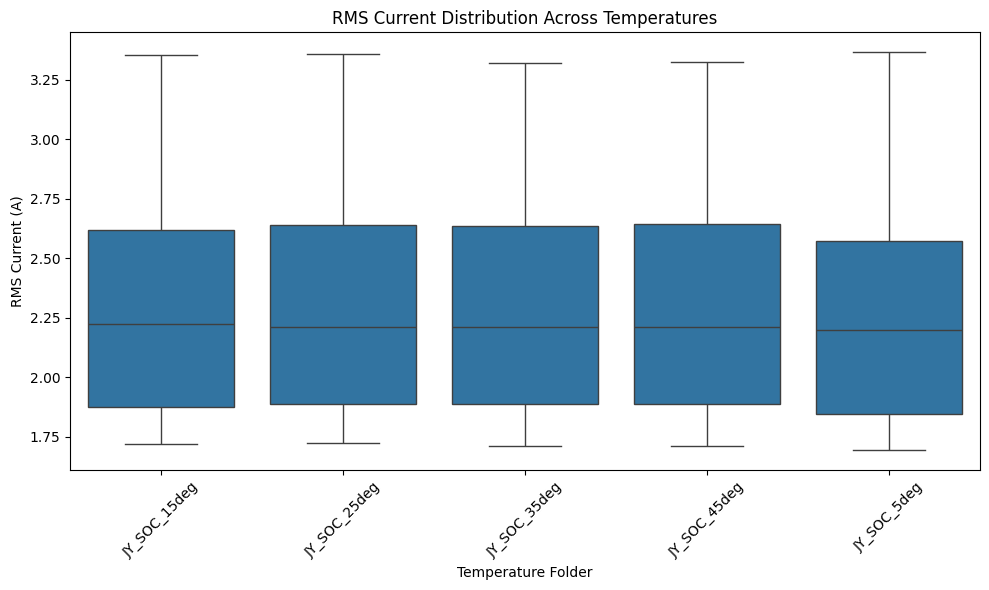

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=stress_df, x='folder', y='rms_current')
plt.title("RMS Current Distribution Across Temperatures")
plt.ylabel("RMS Current (A)")
plt.xlabel("Temperature Folder")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


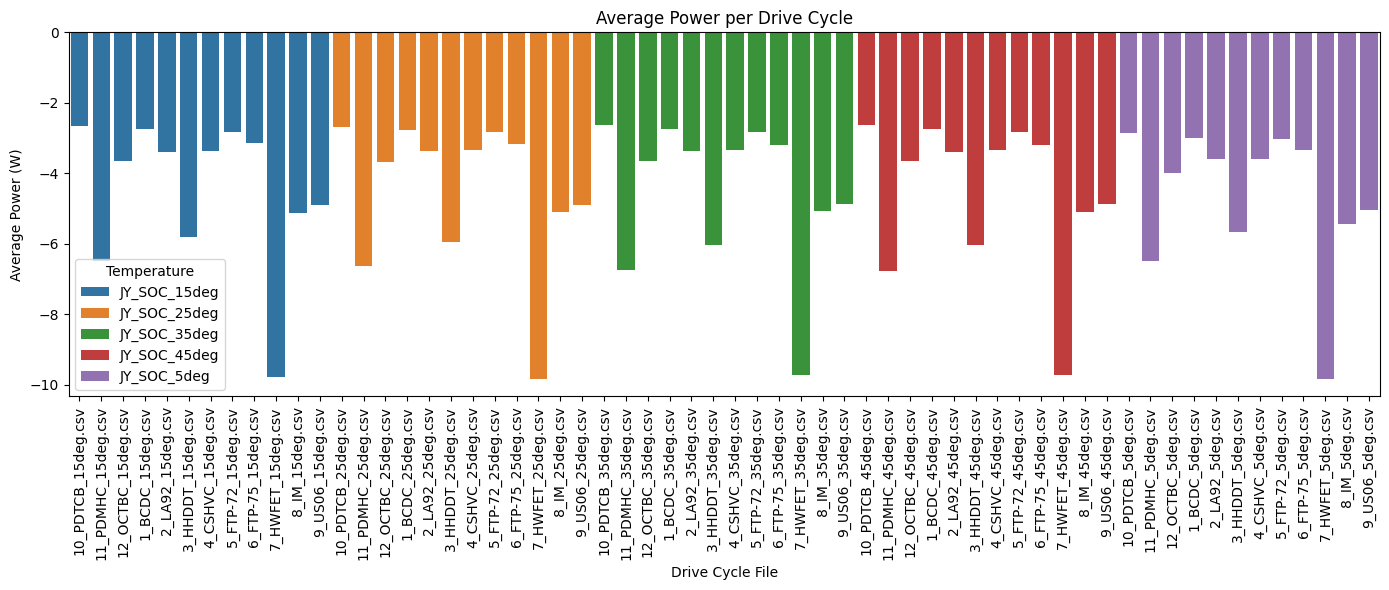

In [9]:
plt.figure(figsize=(14, 6))
sns.barplot(data=stress_df, x='file', y='avg_power', hue='folder')
plt.title("Average Power per Drive Cycle")
plt.ylabel("Average Power (W)")
plt.xlabel("Drive Cycle File")
plt.xticks(rotation=90)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


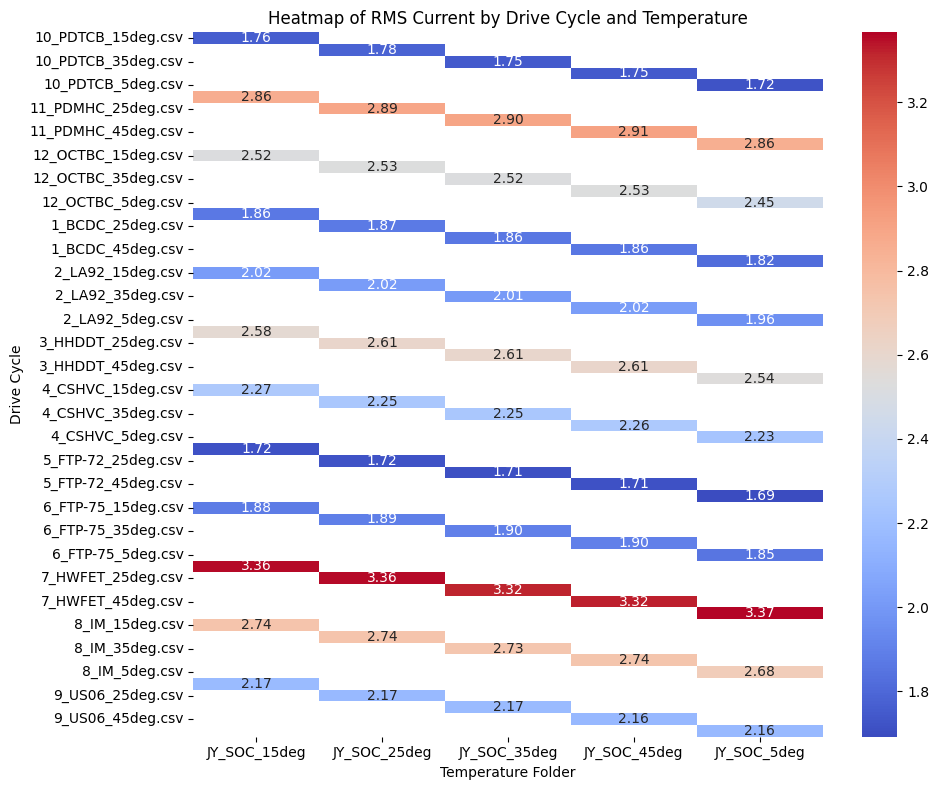

In [10]:
pivot = stress_df.pivot_table(
    index='file', 
    columns='folder', 
    values='rms_current', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of RMS Current by Drive Cycle and Temperature")
plt.ylabel("Drive Cycle")
plt.xlabel("Temperature Folder")
plt.tight_layout()
plt.show()


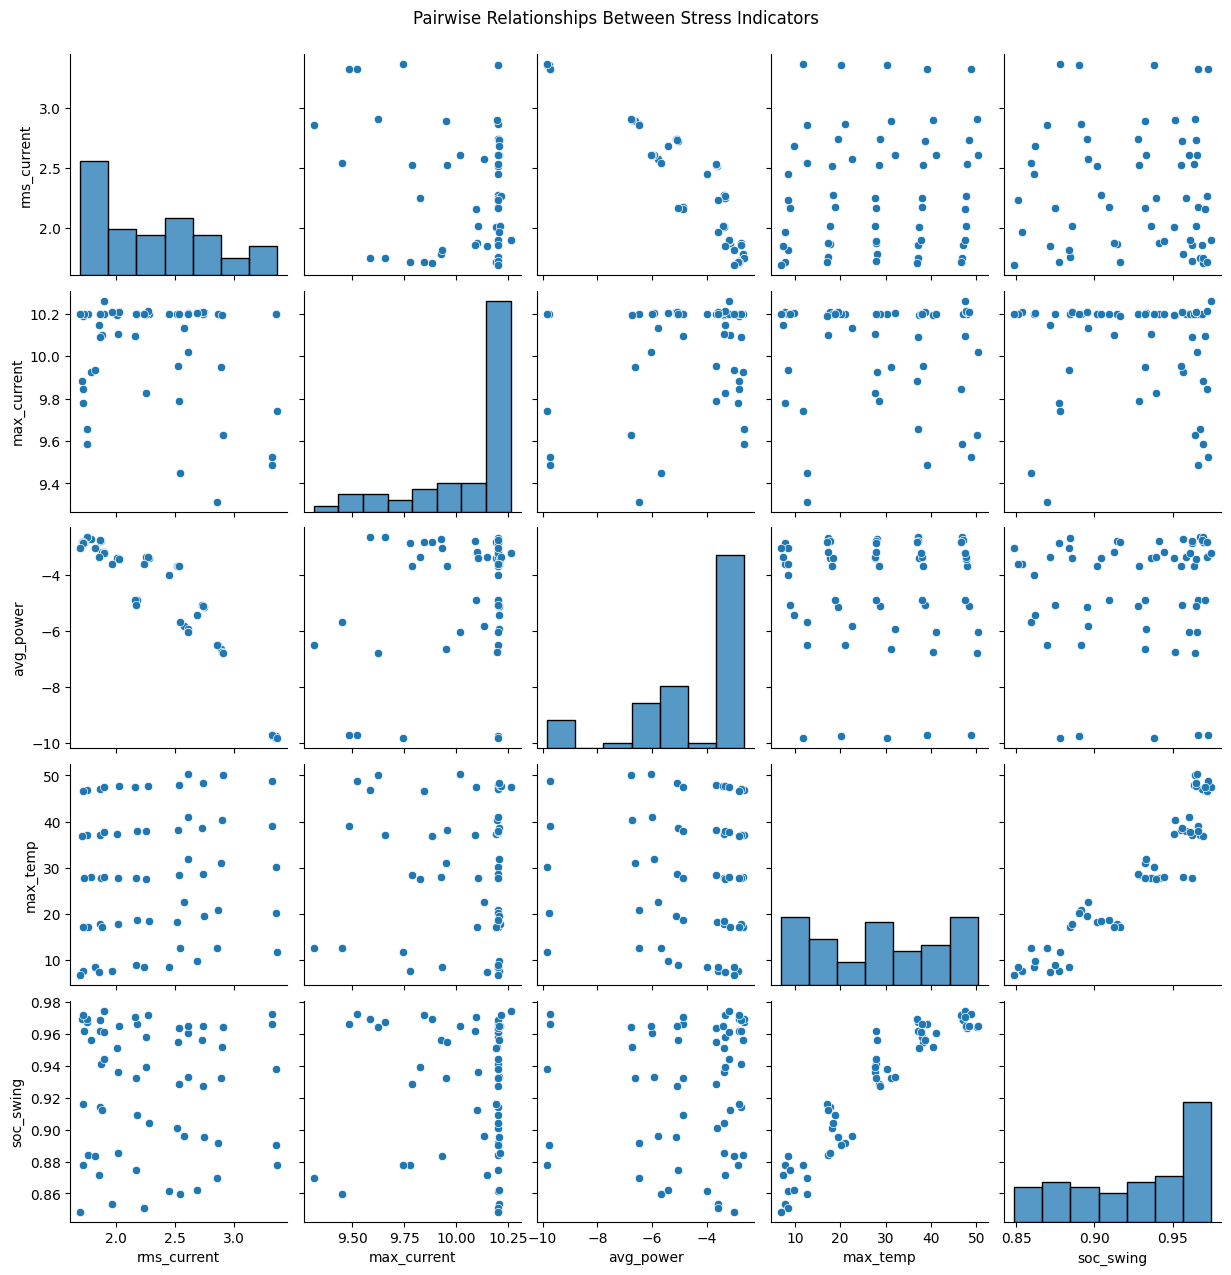

In [11]:
sns.pairplot(stress_df[['rms_current', 'max_current', 'avg_power', 'max_temp', 'soc_swing']])
plt.suptitle("Pairwise Relationships Between Stress Indicators", y=1.02)
plt.show()


In [12]:
# Define drive cycle categories
drive_cycle_map = {
    '1_BCDC': 'City',
    '2_LA92': 'City',
    '3_HHDDT': 'Mixed',
    '4_CSHVC': 'Mixed',
    '5_FTP-72': 'City',
    '6_FTP-75': 'City',
    '7_HWFET': 'Highway',
    '8_IM': 'Test',
    '9_US06': 'Aggressive',
    '10_PDTCB': 'Delivery',
    '11_PDMHC': 'Highway',
    '12_OCTBC': 'Bus'
}

# Add category column
stress_df['drive_cycle'] = stress_df['file'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])
stress_df['category'] = stress_df['drive_cycle'].map(drive_cycle_map)


C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_17724\2503016671.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=stress_df, x='category', y='avg_power', estimator=np.mean, ci='sd')


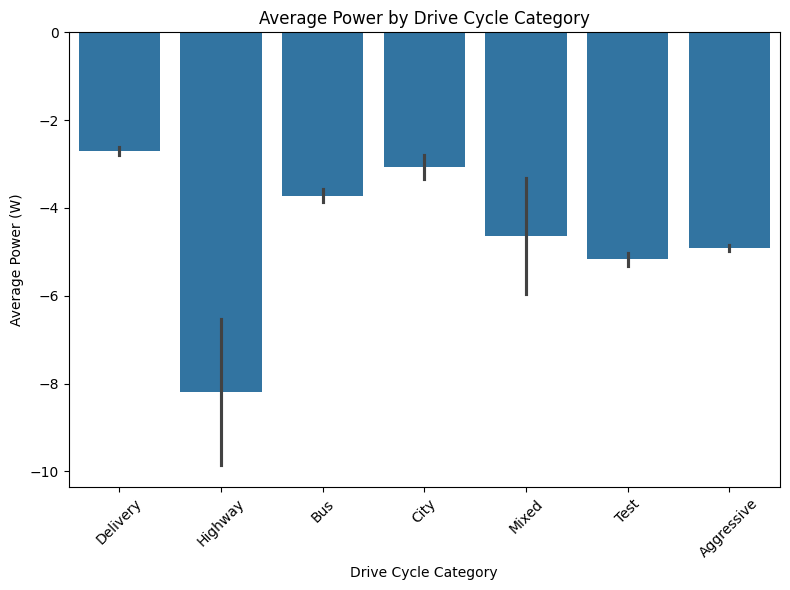

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(data=stress_df, x='category', y='avg_power', estimator=np.mean, ci='sd')
plt.title("Average Power by Drive Cycle Category")
plt.ylabel("Average Power (W)")
plt.xlabel("Drive Cycle Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


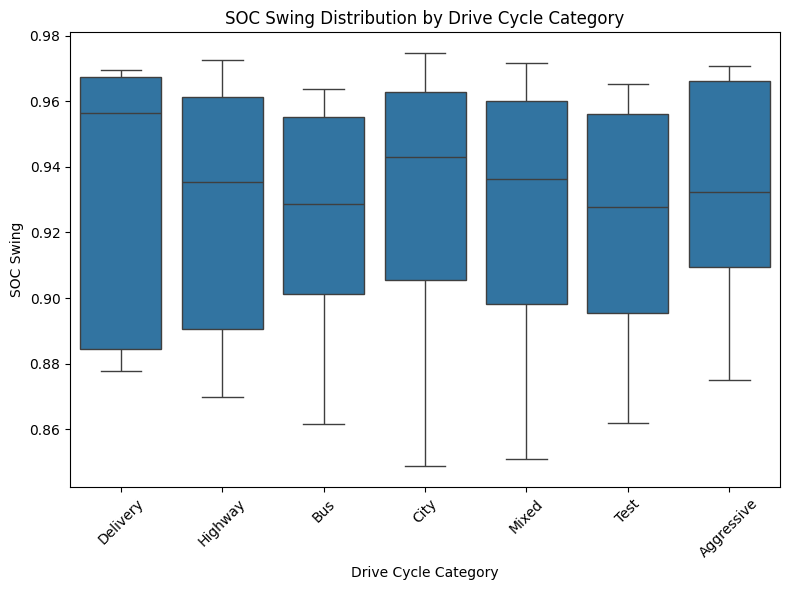

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=stress_df, x='category', y='soc_swing')
plt.title("SOC Swing Distribution by Drive Cycle Category")
plt.ylabel("SOC Swing")
plt.xlabel("Drive Cycle Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


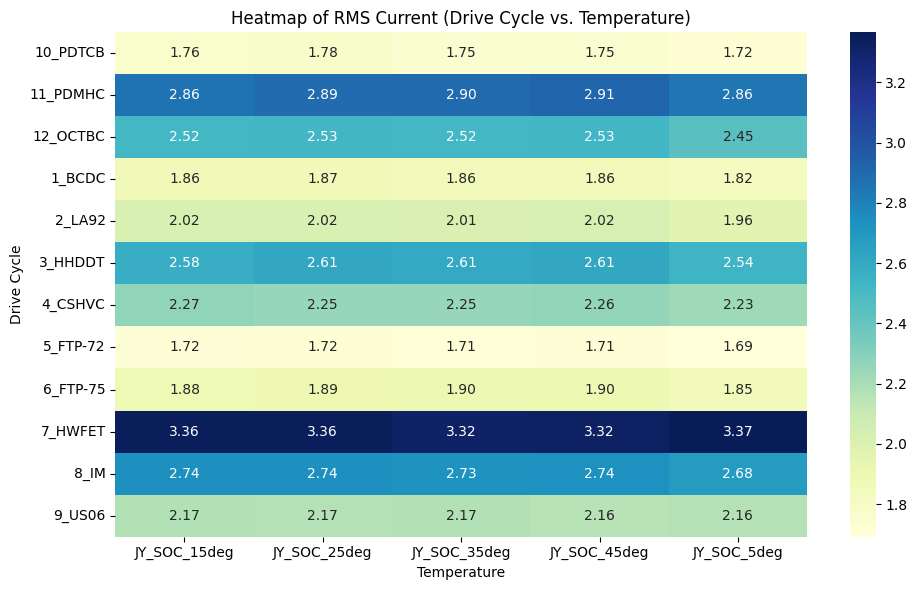

In [15]:
pivot_rms = stress_df.pivot_table(
    index='drive_cycle', 
    columns='folder', 
    values='rms_current', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_rms, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of RMS Current (Drive Cycle vs. Temperature)")
plt.xlabel("Temperature")
plt.ylabel("Drive Cycle")
plt.tight_layout()
plt.show()


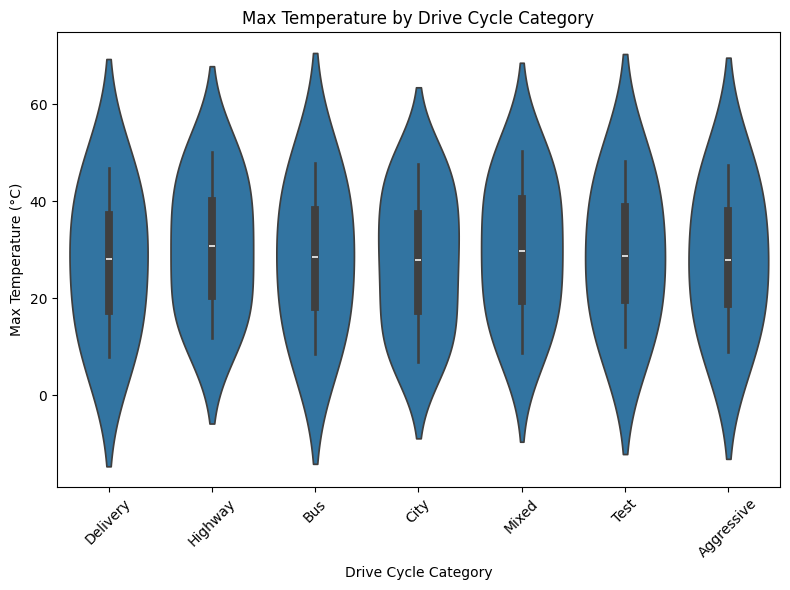

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=stress_df, x='category', y='max_temp')
plt.title("Max Temperature by Drive Cycle Category")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Drive Cycle Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
